In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NA
%matplotlib inline
plt.style.use('fivethirtyeight') # 流行的数据可视化主题
import warnings
warnings.filterwarnings('ignore')

In [2]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration',
'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi',
'pedigree_function', 'age', 'onset_diabetes']

pima = pd.read_csv('data/pima.data', names=pima_column_names)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(1) 怀孕次数；
(2) 口服葡萄糖耐量试验中的2 小时血浆葡萄糖浓度；
(3) 舒张压（mmHg）；
(4) 三头肌皮褶厚度（mm）；
(5) 2 小时血清胰岛素浓度（μU/ml）；
(6) 体重指数［BMI，即体重（kg）除以身高（m）的平方］；
(7) 糖尿病家族函数；
(8) 年龄（岁）；
(9) 类变量（0 或1，代表无或有糖尿病）

# Exploratory Data Analysis

In [3]:
#65%没有糖尿病
pima['onset_diabetes'].value_counts() / pima['onset_diabetes'].count()

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [4]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [5]:
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025581925940>,
      dtype=object)

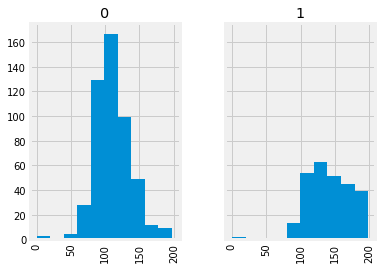

In [6]:
#对“口服葡萄糖耐量试验中的2 小时血浆葡萄糖浓度”绘制直方图查看患者和普通人两类的区别
pima['plasma_glucose_concentration'].hist(by=pima['onset_diabetes'], sharex=True, sharey=True)

onset_diabetes
0    AxesSubplot(0.08,0.125;0.87x0.755)
1    AxesSubplot(0.08,0.125;0.87x0.755)
Name: plasma_glucose_concentration, dtype: object

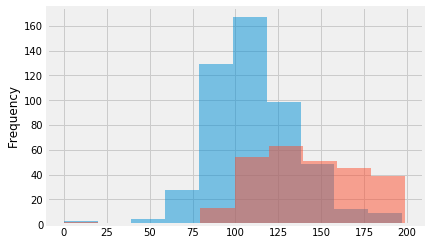

In [7]:
pima.groupby(pima['onset_diabetes'])['plasma_glucose_concentration'].plot.hist(alpha=0.5)

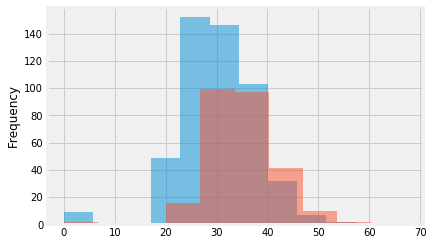

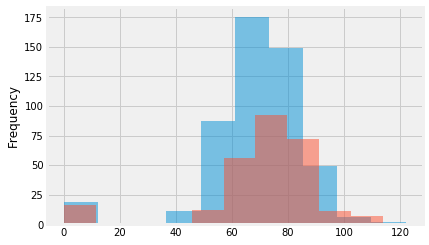

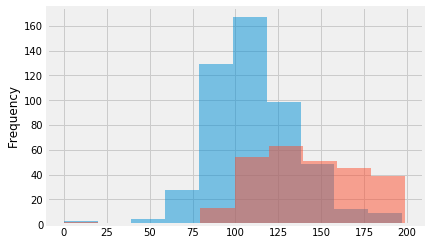

In [8]:
#继续按此绘制其他列的直方图
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    fig = plt.figure()
    pima.groupby(pima['onset_diabetes'])[col].plot.hist(alpha=0.5)

In [9]:
#看出两类人存在明显区别

In [10]:
#线性相关矩阵来量化这些变量间的关系

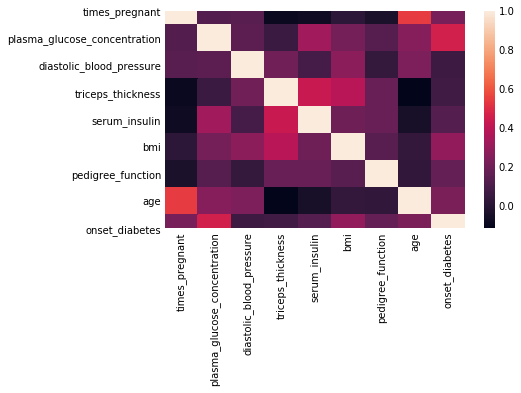

In [11]:
sns.heatmap(pima.corr())

In [12]:
#相关矩阵显示，plasma_glucose_concentration（血浆葡萄糖浓度）和onset_diabetes
#（糖尿病）有很强的相关性

In [13]:
pima.corr()['onset_diabetes'].sort_values(ascending=False)
# plasma_glucose_concentration 很明显是预测糖尿病重要的变量

onset_diabetes                  1.000000
plasma_glucose_concentration    0.466581
bmi                             0.292695
age                             0.238356
times_pregnant                  0.221898
pedigree_function               0.173844
serum_insulin                   0.130548
triceps_thickness               0.074752
diastolic_blood_pressure        0.065068
Name: onset_diabetes, dtype: float64

In [14]:
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#下面这些列中的缺失值用0 填充了：
#plasma_glucose_concentration
#diastolic_blood_pressure
#triceps_thickness
#serum_insulin
#bmi

# 3.2 处理数据集中的缺失值

In [16]:
#将每列的0替换成None，这样fillna和dropna就可以工作了
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration',
'diastolic_blood_pressure', 'triceps_thickness']

for col in columns:
    pima[col] = pima[col].map(lambda x: x if x != 0 else NA)

In [17]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [18]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
#删除有害行
pima_droped = pima.dropna()  # 删除了过多数据行
(len(pima_droped)) / len(pima)

0.5104166666666666

In [20]:
pima_droped['onset_diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [21]:
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [22]:
pima_droped.mean()

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

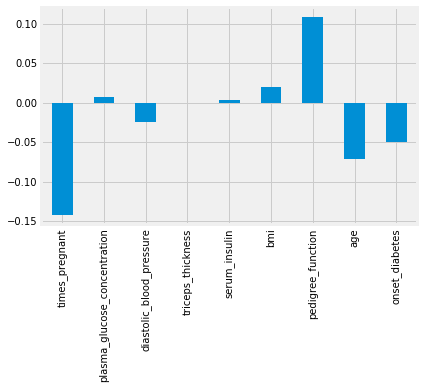

In [23]:
((pima_droped.mean() - pima.mean())/ pima.mean()).plot.bar()

In [24]:
#，times_pregnant（怀孕次数）的均值在删除缺失值后下降了14%，变化很大！
#pedigree_function（糖尿病血系功能）也上升了11%，也是个飞跃。

In [25]:
#开始机器学习
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #自动找到适合的模型
from sklearn.preprocessing import Imputer

In [26]:
x_dropped = pima_droped.drop('onset_diabetes', axis=1)
y_dropped = pima_droped['onset_diabetes']

In [27]:
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]} #超参数

In [28]:
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, knn_params)
grid.fit(x_dropped, y_dropped)
print(grid.best_score_, grid.best_params_)


0.7448979591836735 {'n_neighbors': 7}


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 填充缺失值

In [29]:
#用该列其余值的均值填充
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].
mean(), inplace=True)

In [30]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [31]:
imputer = Imputer(strategy='mean') #填充缺失值
pima_imputed = imputer.fit_transform(pima)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
type(pima_imputed)

numpy.ndarray

In [33]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

In [34]:
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [35]:
X_zero = pima_imputed.drop('onset_diabetes', axis=1)
y_zero = pima_imputed['onset_diabetes']
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)
print(grid.best_score_, grid.best_params_ )

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.73046875 {'n_neighbors': 6}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025586FC36D8>,
      dtype=object)

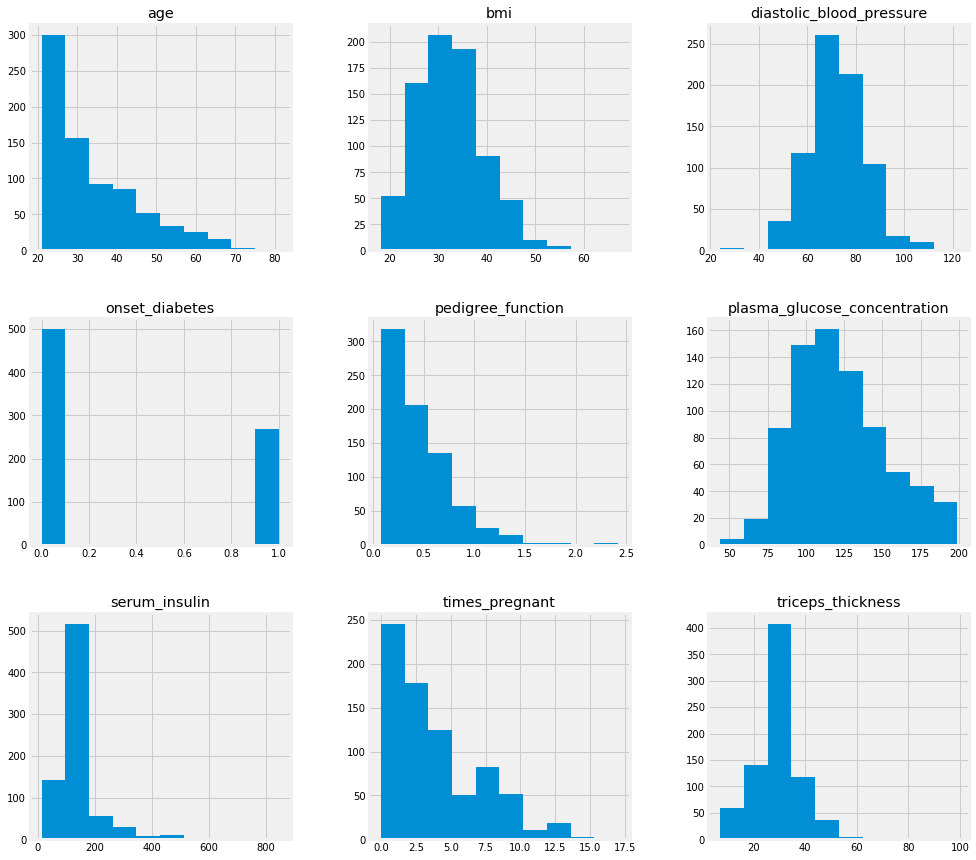

In [44]:
pima_imputed.hist(figsize=(15, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255859FFB70>,
      dtype=object)

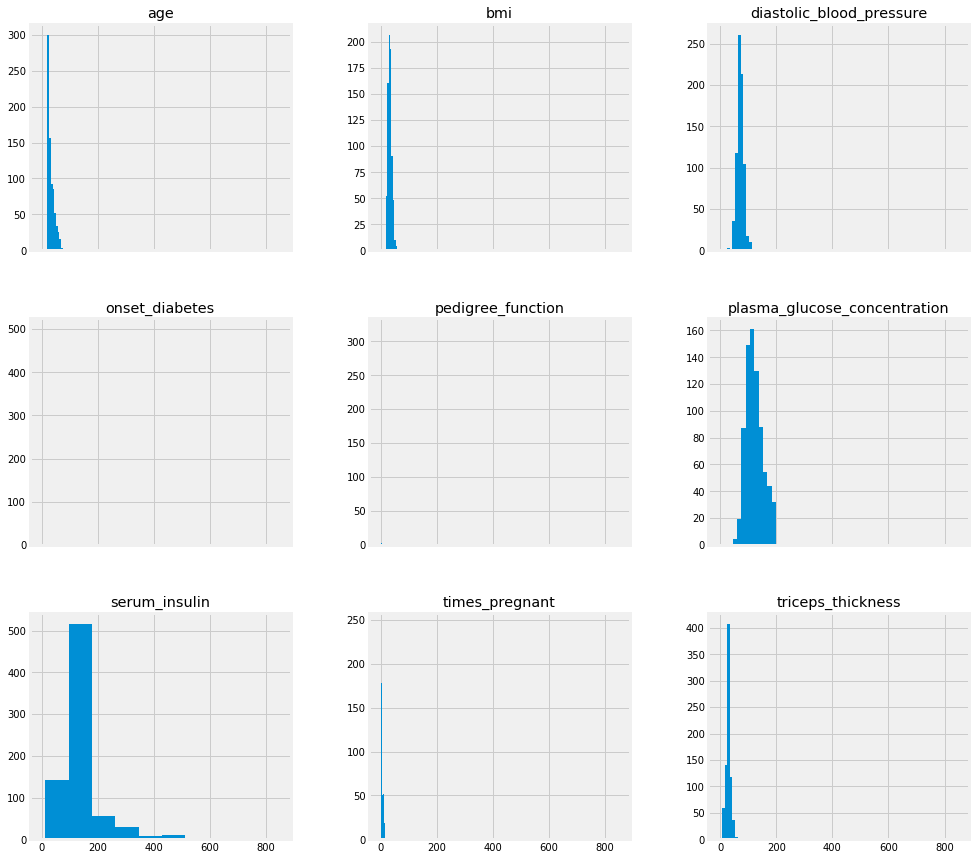

In [45]:
pima_imputed.hist(figsize=(15, 15), sharex=True)

In [80]:
#sklearn做均值0，方差1的标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
glucose_z_score_standardized = scaler.fit_transform(pima_imputed)
pima_scaled = pd.DataFrame(glucose_z_score_standardized, columns=pima_column_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025588886DA0>,
      dtype=object)

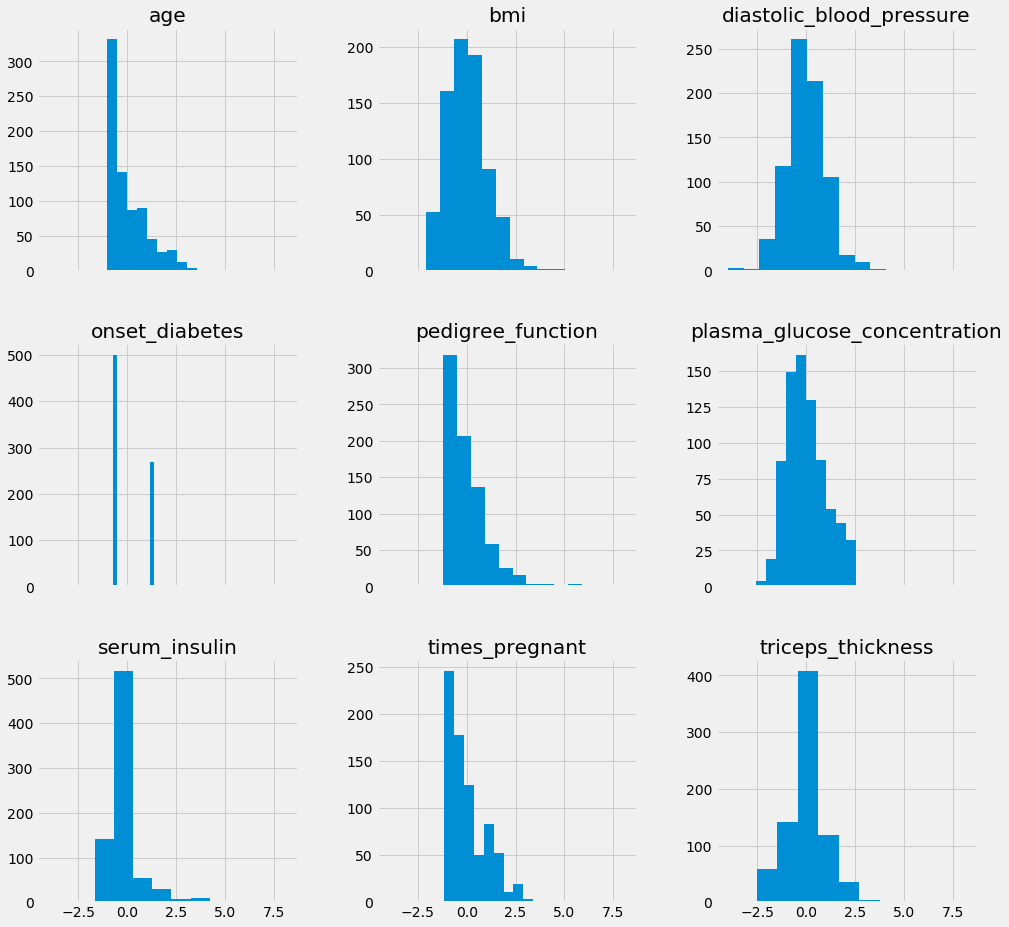

In [82]:
pima_scaled.hist(figsize=(15, 15), sharex=True)

In [83]:
from sklearn.pipeline import Pipeline

knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2,
3, 4, 5, 6, 7]}
knn = KNeighborsClassifier() # 实例化KNN 模型
mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize',
StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

0.7421875 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


In [79]:
# min-max标准化
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [85]:
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed),
columns=pima_column_names)
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2,
3, 4, 5, 6, 7]}
mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize',
MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}
